In [1]:
import zipfile
import os
#puthorn style 
zip_path = "Zipfile_Data.zip"
extracted_path = "Questionnair/"

os.makedirs(extracted_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

extracted_files = os.listdir(extracted_path)
extracted_files




['Man Avatar.csv',
 'MergeFileUnityAndHrvLFHF',
 'Robot Avatar.csv',
 'Woman Avatar.csv']

In [2]:

data_path = os.path.join(extracted_path, 'MergeFileUnityAndHrvLFHF')
data_files = os.listdir(data_path)

data_files


['0000_Man.csv',
 '0000_Robot.csv',
 '0000_Woman.csv',
 '0001_Man.csv',
 '0001_Robot.csv',
 '0001_Woman.csv',
 '0002_Man.csv',
 '0002_Robot.csv',
 '0002_Woman.csv',
 '0003_Man.csv',
 '0003_Robot.csv',
 '0003_Woman.csv',
 '0004_Man.csv',
 '0004_Robot.csv',
 '0004_Woman.csv',
 '0005_Man.csv',
 '0005_Robot.csv',
 '0005_Woman.csv',
 '0006_Man.csv',
 '0006_Robot.csv',
 '0006_Woman.csv',
 '0007_Man.csv',
 '0007_Robot.csv',
 '0007_Woman.csv',
 '0008_Man.csv',
 '0008_Robot.csv',
 '0008_Woman.csv',
 '0009_Man.csv',
 '0009_Robot.csv',
 '0009_Woman.csv',
 '0010_Man.csv',
 '0010_Robot.csv',
 '0010_Woman.csv',
 '0011_Man.csv',
 '0011_Robot.csv',
 '0011_Woman.csv',
 '0012_Man.csv',
 '0012_Robot.csv',
 '0012_Woman.csv',
 '0013_Man.csv',
 '0013_Robot.csv',
 '0013_Woman.csv',
 '0014_Man.csv',
 '0014_Robot.csv',
 '0014_Woman.csv',
 '0015_Man.csv',
 '0015_Robot.csv',
 '0015_Woman.csv',
 '0016_Man.csv',
 '0016_Robot.csv',
 '0016_Woman.csv',
 '0017_Man.csv',
 '0017_Robot.csv',
 '0017_Woman.csv',
 '0018_Man

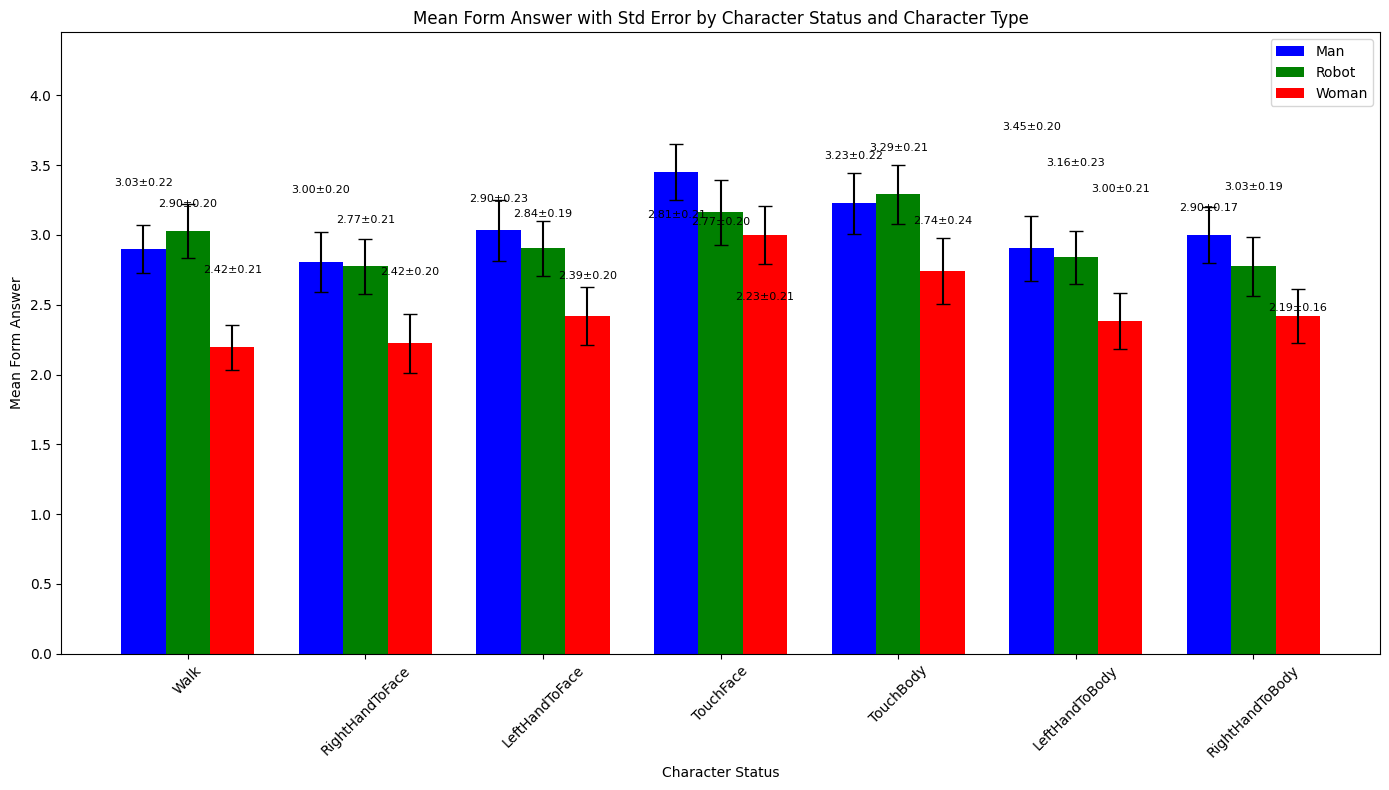

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#Load all files into separate 
man_data_list = []
robot_data_list = []
woman_data_list = []

for file_name in data_files:
    file_path = os.path.join(data_path, file_name)
    try:
        df = pd.read_csv(file_path)
        # Check Form_Answer
        if 'Form_Answer' not in df.columns:
            print(f"Column 'Form_Answer' not found in {file_name}. Skipping this file.")
            continue

        df['Character_status'] = df['Character_status'].fillna('Walk')

        
        if 'Man' in file_name:
            man_data_list.append(df)
        elif 'Robot' in file_name:
            robot_data_list.append(df)
        elif 'Woman' in file_name:
            woman_data_list.append(df)

    except FileNotFoundError:
        # หาไฟล์ไม่เจอขึ้น Error Detec
        print(f"File not found: {file_name}. Skipping.")
        continue

#Combine 
man_data = pd.concat(man_data_list, ignore_index=True) if man_data_list else pd.DataFrame()
robot_data = pd.concat(robot_data_list, ignore_index=True) if robot_data_list else pd.DataFrame()
woman_data = pd.concat(woman_data_list, ignore_index=True) if woman_data_list else pd.DataFrame()


if 'Form_Answer' in man_data.columns:
    man_data = man_data.dropna(subset=['Form_Answer'])
if 'Form_Answer' in robot_data.columns:
    robot_data = robot_data.dropna(subset=['Form_Answer'])
if 'Form_Answer' in woman_data.columns:
    woman_data = woman_data.dropna(subset=['Form_Answer'])

#Std Error 
def get_summary_data(df):
    if df.empty:
        return pd.DataFrame(columns=['Character_status', 'mean', 'sem'])
    return df.groupby('Character_status')['Form_Answer'].agg(['mean', 'sem']).reset_index()


man_summary = get_summary_data(man_data)
robot_summary = get_summary_data(robot_data)
woman_summary = get_summary_data(woman_data)

# Define the order of Character_status
status_order = ['Walk', 'RightHandToFace', 'LeftHandToFace', 'TouchFace', 'TouchBody', 'LeftHandToBody', 'RightHandToBody']

# Reorder based on the defined order
man_summary['Character_status'] = pd.Categorical(man_summary['Character_status'], categories=status_order, ordered=True)
robot_summary['Character_status'] = pd.Categorical(robot_summary['Character_status'], categories=status_order, ordered=True)
woman_summary['Character_status'] = pd.Categorical(woman_summary['Character_status'], categories=status_order, ordered=True)

man_summary = man_summary.sort_values('Character_status')
robot_summary = robot_summary.sort_values('Character_status')
woman_summary = woman_summary.sort_values('Character_status')

# Plot the bar graph for each character type if data is available
plt.figure(figsize=(14, 8))
bar_width = 0.25
x = np.arange(len(status_order))

# Plot each bar with offset for each character type if data exists
if not man_summary.empty:
    plt.bar(x - bar_width, man_summary['mean'], yerr=man_summary['sem'], width=bar_width, capsize=5, label='Man', color='blue')
if not robot_summary.empty:
    plt.bar(x, robot_summary['mean'], yerr=robot_summary['sem'], width=bar_width, capsize=5, label='Robot', color='green')
if not woman_summary.empty:
    plt.bar(x + bar_width, woman_summary['mean'], yerr=woman_summary['sem'], width=bar_width, capsize=5, label='Woman', color='red')

# Labels and title
plt.xlabel('Character Status')
plt.ylabel('Mean Form Answer')
plt.title('Mean Form Answer with Std Error by Character Status and Character Type')
plt.xticks(x, status_order, rotation=45)
plt.ylim(0, max(man_summary['mean'].max() if not man_summary.empty else 0,
                robot_summary['mean'].max() if not robot_summary.empty else 0,
                woman_summary['mean'].max() if not woman_summary.empty else 0) + 1)


plt.grid(False)

if not man_summary.empty or not robot_summary.empty or not woman_summary.empty:
    plt.legend()


if not man_summary.empty:
    for i, row in man_summary.iterrows():
        plt.text(i - bar_width, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)
if not robot_summary.empty:
    for i, row in robot_summary.iterrows():
        plt.text(i, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)
if not woman_summary.empty:
    for i, row in woman_summary.iterrows():
        plt.text(i + bar_width, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)
plt.tight_layout()
plt.show()


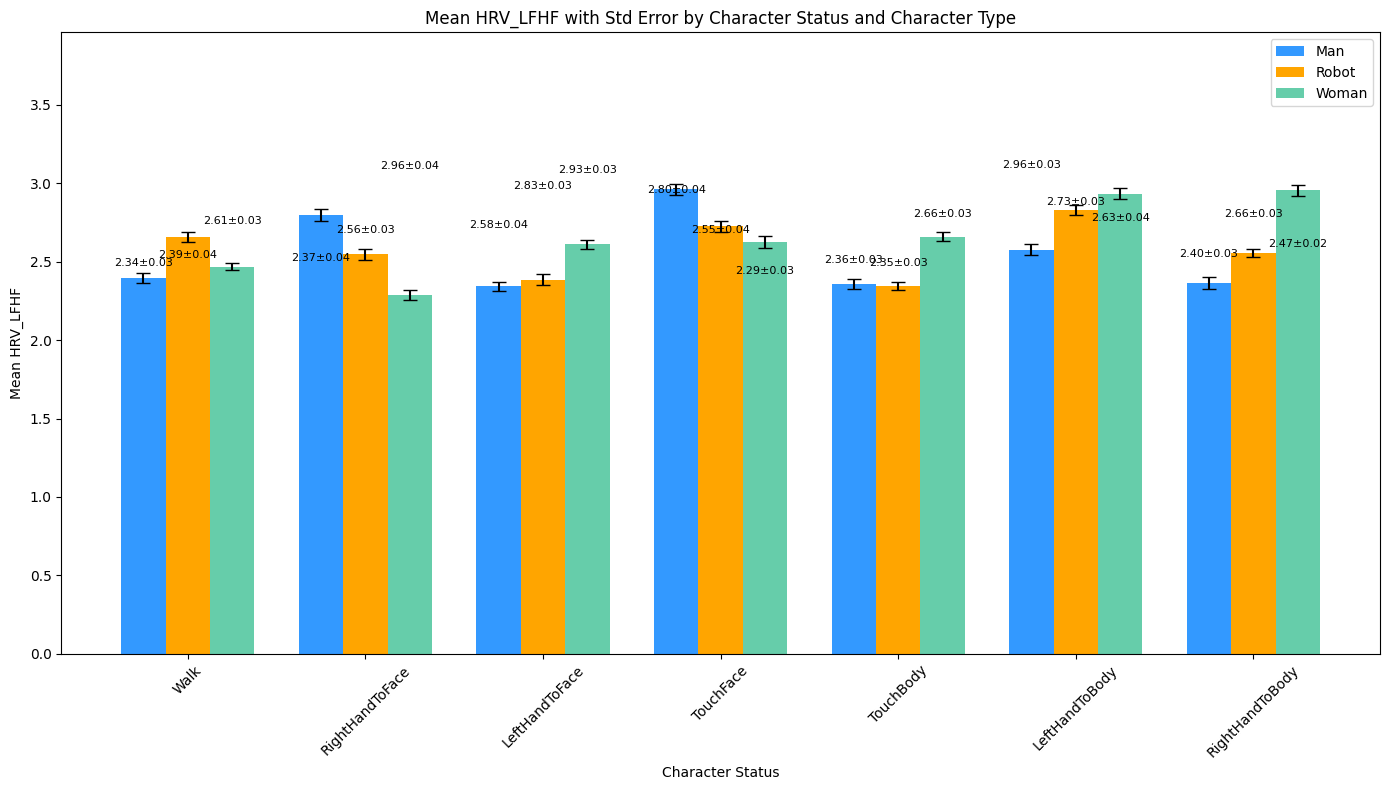

In [17]:
#loadfile in array 
man_hrv_list = []
robot_hrv_list = []
woman_hrv_list = []

for file_name in data_files:
    file_path = os.path.join(data_path, file_name)
    try:
        df = pd.read_csv(file_path)
        # Check if 'HRV_LFHF' column exists
        if 'HRV_LFHF' not in df.columns:
            print(f"Column 'HRV_LFHF' not found in {file_name}. Skipping this file.")
            continue

        # Replace NaN values in 'Character_status' with 'Walk'
        df['Character_status'] = df['Character_status'].fillna('Walk')

        # Append data to the respective list based on the character type
        if 'Man' in file_name:
            man_hrv_list.append(df)
        elif 'Robot' in file_name:
            robot_hrv_list.append(df)
        elif 'Woman' in file_name:
            woman_hrv_list.append(df)

    except FileNotFoundError:
        # Skip files that don't exist
        print(f"File not found: {file_name}. Skipping.")
        continue

#Combine the list 
man_hrv_data = pd.concat(man_hrv_list, ignore_index=True) if man_hrv_list else pd.DataFrame()
robot_hrv_data = pd.concat(robot_hrv_list, ignore_index=True) if robot_hrv_list else pd.DataFrame()
woman_hrv_data = pd.concat(woman_hrv_list, ignore_index=True) if woman_hrv_list else pd.DataFrame()

#Remove rows where 'HRV_LFHF' is NaN
if 'HRV_LFHF' in man_hrv_data.columns:
    man_hrv_data = man_hrv_data.dropna(subset=['HRV_LFHF'])
if 'HRV_LFHF' in robot_hrv_data.columns:
    robot_hrv_data = robot_hrv_data.dropna(subset=['HRV_LFHF'])
if 'HRV_LFHF' in woman_hrv_data.columns:
    woman_hrv_data = woman_hrv_data.dropna(subset=['HRV_LFHF'])

#Function to calculate mean and standard error for HRV_LFHF
def get_hrv_summary_data(df):
    if df.empty:
        return pd.DataFrame(columns=['Character_status', 'mean', 'sem'])
    return df.groupby('Character_status')['HRV_LFHF'].agg(['mean', 'sem']).reset_index()

man_hrv_summary = get_hrv_summary_data(man_hrv_data)
robot_hrv_summary = get_hrv_summary_data(robot_hrv_data)
woman_hrv_summary = get_hrv_summary_data(woman_hrv_data)

man_hrv_summary['Character_status'] = pd.Categorical(man_hrv_summary['Character_status'], categories=status_order, ordered=True)
robot_hrv_summary['Character_status'] = pd.Categorical(robot_hrv_summary['Character_status'], categories=status_order, ordered=True)
woman_hrv_summary['Character_status'] = pd.Categorical(woman_hrv_summary['Character_status'], categories=status_order, ordered=True)

man_hrv_summary = man_hrv_summary.sort_values('Character_status')
robot_hrv_summary = robot_hrv_summary.sort_values('Character_status')
woman_hrv_summary = woman_hrv_summary.sort_values('Character_status')

#plt
plt.figure(figsize=(14, 8))
bar_width = 0.25
x = np.arange(len(status_order))


if not man_hrv_summary.empty:
    plt.bar(x - bar_width, man_hrv_summary['mean'], yerr=man_hrv_summary['sem'], width=bar_width, capsize=5, label='Man', color='#3399FF')  # Blue color for Man
if not robot_hrv_summary.empty:
    plt.bar(x, robot_hrv_summary['mean'], yerr=robot_hrv_summary['sem'], width=bar_width, capsize=5, label='Robot', color='#FFA500')  # Orange color for Robot
if not woman_hrv_summary.empty:
    plt.bar(x + bar_width, woman_hrv_summary['mean'], yerr=woman_hrv_summary['sem'], width=bar_width, capsize=5, label='Woman', color='#66CDAA')  # Green color for Woman

plt.xlabel('Character Status')
plt.ylabel('Mean HRV_LFHF')
plt.title('Mean HRV_LFHF with Std Error by Character Status and Character Type')
plt.xticks(x, status_order, rotation=45)
plt.ylim(0, max(man_hrv_summary['mean'].max() if not man_hrv_summary.empty else 0,
                robot_hrv_summary['mean'].max() if not robot_hrv_summary.empty else 0,
                woman_hrv_summary['mean'].max() if not woman_hrv_summary.empty else 0) + 1)


plt.grid(False)
if not man_hrv_summary.empty or not robot_hrv_summary.empty or not woman_hrv_summary.empty:
    plt.legend()

if not man_hrv_summary.empty:
    for i, row in man_hrv_summary.iterrows():
        plt.text(i - bar_width, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)
if not robot_hrv_summary.empty:
    for i, row in robot_hrv_summary.iterrows():
        plt.text(i, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)
if not woman_hrv_summary.empty:
    for i, row in woman_hrv_summary.iterrows():
        plt.text(i + bar_width, row['mean'] + row['sem'] + 0.1, f"{row['mean']:.2f}±{row['sem']:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

